In [43]:
import pandas as pd
import numpy as np

<h2> Getting data from Github Repository by Johns Hopkins CSSE

In [44]:
meta = ["recovered", "confirmed","deaths"]
data = [pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv".format(i),error_bad_lines=False)  for i in meta]

<H2> Defining countries in scope

In [45]:
scope = ["US","China","Turkey","Germany"]

In [46]:
limit1 = len(data[2].columns)
limit2 = len(data[1].columns)

<H2> Merging different regions of individual countries

In [47]:
scopeDataD = []

for i in scope:
    data_ = data[2][data[2]["Country/Region"] == i].iloc[: , list(range(4,limit1))].transpose().reset_index()
    sum_row = data_.sum(axis=1)
    data_["sum"] = pd.DataFrame(sum_row)
    data_ = data_[["index","sum"]]
    data_.columns = ["Date","Quantity"]
    scopeDataD.append(data_)

scopeDataC = []

for i in scope:
    data_ = data[1][data[1]["Country/Region"] == i].iloc[: , list(range(4,limit2))].transpose().reset_index()
    sum_row = data_.sum(axis=1)
    data_["sum"] = pd.DataFrame(sum_row)
    data_ = data_[["index","sum"]]
    data_.columns = ["Date","Quantity"]
    scopeDataC.append(data_)

In [39]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

In [40]:
for i in range(len(scopeDataC)):
    scopeDataC[i]["Deaths"] = scopeDataD[i]["Quantity"]
    scopeDataC[i]["Rate"] = (pd.to_numeric(scopeDataC[i]["Deaths"])/pd.to_numeric(scopeDataC[i]["Quantity"]))*100
    scopeDataC[i]
for i in range(len(scopeDataC)):
    scopeDataC[i] = scopeDataC[i].fillna(0)


In [41]:
plt.rcParams["figure.figsize"] = (20,10)

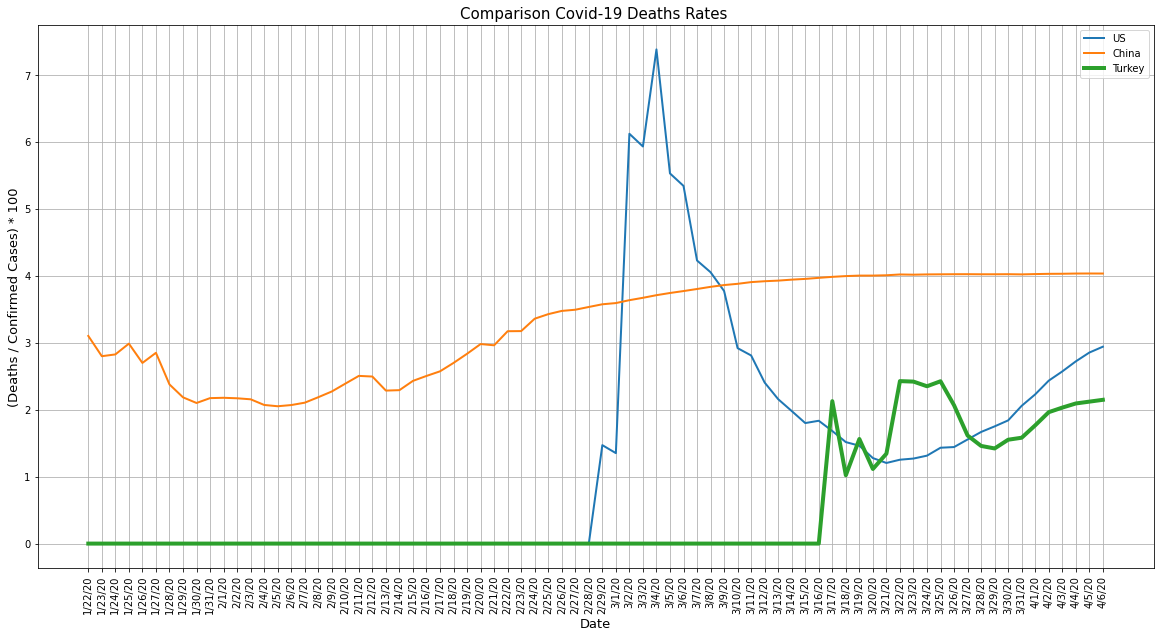

In [42]:
for i in range(len(scope)):
    if scope[i] == "Turkey":
        plt.plot(scopeDataC[0].Date,scopeDataC[i].Rate, linewidth=4)
    else:
        plt.plot(scopeDataC[0].Date,scopeDataC[i].Rate, linewidth=2)
plt.xticks(rotation='vertical')
plt.legend( scope)
plt.title("Comparison Covid-19 Deaths Rates ",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("(Deaths / Confirmed Cases) * 100",fontsize=13)
plt.grid()

 ffmpeg -framerate 4 -i foto%01d.png -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p output.mp4
